In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
vaccine_source = pd.read_csv("/content/country_vaccinations.csv")
vaccine_source[:3][['country','people_fully_vaccinated']]

,country,people_fully_vaccinated
0,Afghanistan,NaN
1,Afghanistan,NaN
2,Afghanistan,NaN


In [3]:
population_source = pd.read_csv("/content/2021_population.csv")
population_source = population_source.rename(columns={'2021_last_updated': 'population'})
population_source.head(5)
population_source[:3][['country', 'population']]

,country,population
0,China,"1,446,285,369"
1,India,"1,399,147,562"
2,United States,"333,745,439"


In [5]:
who_source = pd.read_csv("/content/WHO-COVID-19-global-data.csv")
who_source = who_source.rename(columns={"Country":"country", "Date_reported":"date" })
who_source.head(2)


,date,Country_code,country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
set(who_source.country) - set(population_source.country)

{'Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo',
 'Curaçao',
 'Czechia',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guadeloupe',
 'Guernsey',
 'Guinea-Bissau',
 'Holy See',
 'Iran (Islamic Republic of)',
 'Isle of Man',
 'Jersey',
 'Kosovo[1]',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Northern Mariana Islands (Commonwealth of the)',
 'Other',
 'Pitcairn Islands',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'Saba',
 'Saint Barthélemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Sint Eustatius',
 'Syrian Arab Republic',
 'The United Kingdom',
 'Timor-Leste',
 'Trinidad and Tobago',
 

In [7]:
toedit = {"Antigua And Barbuda": 'Antigua and Barbuda',
 "Bolivia": 'Bolivia (Plurinational State of)',
 "Bosnia And Herzegovina": 'Bosnia and Herzegovina',
 "Brunei": 'Brunei Darussalam',
 "Cape Verde": 'Cabo Verde',
 "Curacao": 'Curaçao',
 "North Korea": "Democratic People's Republic of Korea",
 "Republic Of The Congo": 'Democratic Republic of the Congo',
 "Falkland Islands": 'Falkland Islands (Malvinas)',
 "Guinea Bissau": 'Guinea-Bissau',
 "Iran": 'Iran (Islamic Republic of)',
 "Isle Of Man": 'Isle of Man',
 "Laos": "Lao People's Democratic Republic",
 "Micronesia": 'Micronesia (Federated States of)',
 "Northern Mariana Islands": 'Northern Mariana Islands (Commonwealth of the)',
 "South Korea": 'Republic of Korea',
 "Moldova": 'Republic of Moldova',
 "Russia": 'Russian Federation',
 "Reunion": 'Réunion',
 "Saint Kitts And Nevis": 'Saint Kitts and Nevis',
 "Saint Pierre And Miquelon": 'Saint Pierre and Miquelon',
 "Saint Vincent And The Grenadines": 'Saint Vincent and the Grenadines',
 "Sao Tome And Principe": 'Sao Tome and Principe',
 "Syria": 'Syrian Arab Republic',
 "United Kingdom": 'The United Kingdom',
 "Timor Leste": 'Timor-Leste',
 "Trinidad And Tobago": 'Trinidad and Tobago',
 "Turks And Caicos Islands": 'Turks and Caicos Islands',
 "Tanzania": 'United Republic of Tanzania',
 "United States": 'United States of America',
 "Venezuela": 'Venezuela (Bolivarian Republic of)',
 "Vietnam": 'Viet Nam',
 "Wallis And Futuna": 'Wallis and Futuna',
 "Palestine": 'occupied Palestinian territory, including east Jerusalem'}
population_source["country"] = population_source["country"].replace(toedit)
vaccine_source["country"] = vaccine_source["country"].replace(toedit)

In [8]:
who = who_source[["date", "country","New_deaths", 'New_cases']]
population = population_source[["iso_code","country", "population"]]
vaccine = vaccine_source[["country","iso_code","date","total_vaccinations","people_vaccinated","people_fully_vaccinated"]]
#Menghapus data dengan nilai NaN
vaccine = vaccine.dropna().reset_index(drop=True)

In [9]:
vaccine.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0


In [10]:
who_population_merge = pd.merge(who, population)
who_population_merge.head(2)

,date,country,New_deaths,New_cases,iso_code,population
0,2020-01-03,Afghanistan,0,0,AFG,"40,227,054"
1,2020-01-04,Afghanistan,0,0,AFG,"40,227,054"


In [11]:
df = pd.merge(vaccine,who_population_merge).reset_index(drop=True)
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,New_cases,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,340,"40,227,054"
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,453,"40,227,054"
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,547,"40,227,054"
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,840,"40,227,054"
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,623,"40,227,054"


In [12]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       

In [13]:
def f_1(row):
    row.population = row.population.replace(',','')
    return row
df=df.apply(f_1, axis=1)
df.population = df.population.astype("float64")
df.people_vaccinated = df.people_vaccinated.astype("float64")

In [14]:
df = df.assign(ratio=[0]*len(df))
def f_2(row):
    row.ratio = row.people_fully_vaccinated / row.population * 100 
    return row
df=df.apply(f_2, axis=1)

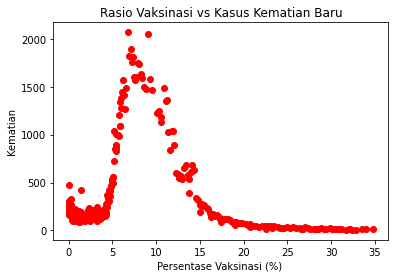

In [15]:
mydf= df
mydf = mydf[mydf.country == "Indonesia"]
plt.scatter(mydf.ratio, mydf.New_deaths , color='red')
print("\n")
plt.title('Rasio Vaksinasi vs Kasus Kematian Baru')
plt.xlabel("Persentase Vaksinasi (%) ")
plt.ylabel("Kematian")
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)
# Coefficients dan Intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-10.76725582]]
Intercept:  [506.98763596]


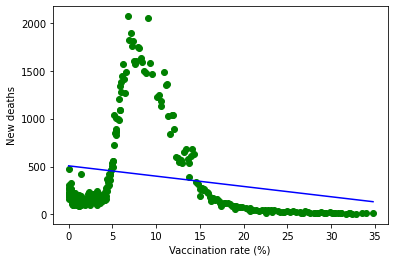

In [17]:
plt.scatter(mydf.ratio, mydf.New_deaths,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='blue')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

Coefficients:  [[-10.76725582]]
Intercept:  [506.98763596]




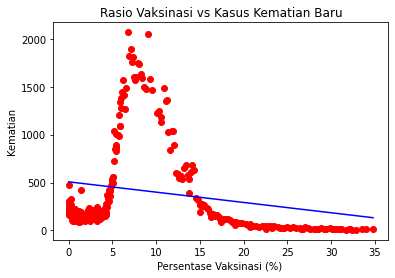



Mean absolute error: 361.70
Residual sum of squares (MSE): 227099.17
R2-score: 0.05


In [31]:
from sklearn.metrics import r2_score

mydf = df[df.country == "Indonesia"]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)


print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('\n')

plt.scatter(mydf.ratio, mydf.New_deaths,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='blue')
plt.title('Rasio Vaksinasi vs Kasus Kematian Baru')
plt.xlabel("Persentase Vaksinasi (%) ")
plt.ylabel("Kematian")
plt.show()

test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
test_y_ = regr.predict(test_x)

print ('\n')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )